# Import

In [1]:
import pandas as pd
import numpy as np
import random
import time
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, Normalizer, Binarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score,mean_squared_log_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from scipy.stats import uniform as sp_rand

pd.options.display.max_rows = 15
import warnings
warnings.filterwarnings('ignore')

# Load The Data & Explore

In [4]:
walmart=pd.read_csv('clean_data.csv')
#walmart=pd.read_csv('/content/sample_data/clean_data.csv')
walmart.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Month,Quarter,Year
0,2010-02-05,1,1,24924.50,0,A,151315,42.31,2.572,0.0,...,0.0,211.096358,8.106,0,0,0,0,2,1,2010
1,2010-02-12,1,1,46039.49,1,A,151315,38.51,2.548,0.0,...,0.0,211.242170,8.106,1,0,0,0,2,1,2010
2,2010-02-19,1,1,41595.55,0,A,151315,39.93,2.514,0.0,...,0.0,211.289143,8.106,0,0,0,0,2,1,2010
3,2010-02-26,1,1,19403.54,0,A,151315,46.63,2.561,0.0,...,0.0,211.319643,8.106,0,0,0,0,2,1,2010
4,2010-03-05,1,1,21827.90,0,A,151315,46.50,2.625,0.0,...,0.0,211.350143,8.106,0,0,0,0,3,1,2010


In [5]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          421570 non-null  object 
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  Super_Bowl    421570 non-null  int64  
 17  Labor_Day     421570 non-null  int64  
 18  Than

# ML Model

## Feature Engineering
### Label Encoding

In [6]:
df=walmart.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_list=['Store','Dept','Month','Quarter','Year']
# Apply label encoding to columns in the list
for col in label_list:
    df[col+'_Encoded']=label_encoder.fit_transform(df[col])
df=df.drop(label_list,axis=1)

### One Hot Encoding

In [7]:
#columns need to be encoded
df=pd.get_dummies(df, columns=['Type'], prefix=['Type'], drop_first=True, dtype=int)

### Drop Useless Cols

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Weekly_Sales     421570 non-null  float64
 1   IsHoliday        421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Temperature      421570 non-null  float64
 4   Fuel_Price       421570 non-null  float64
 5   MarkDown1        421570 non-null  float64
 6   MarkDown2        421570 non-null  float64
 7   MarkDown3        421570 non-null  float64
 8   MarkDown4        421570 non-null  float64
 9   MarkDown5        421570 non-null  float64
 10  CPI              421570 non-null  float64
 11  Unemployment     421570 non-null  float64
 12  Super_Bowl       421570 non-null  int64  
 13  Labor_Day        421570 non-null  int64  
 14  Thanksgiving     421570 non-null  int64  
 15  Christmas        421570 non-null  int64  
 16  Store_Encoded    421570 non-nu

# Training Testing Split

In [10]:
X=df.drop('Weekly_Sales', axis=1)
y=df['Weekly_Sales']

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=12)

## Modeling
### Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=12)
rf_model=rf.fit(X_train, y_train)

In [13]:
y_pred = rf_model.predict(X_test)
y_trainpred = rf_model.predict(X_train)
RMSE_train=mean_squared_error(y_train, y_trainpred,squared=False)
RMSE_test=mean_squared_error(y_test, y_pred,squared=False)
R2_test=r2_score(y_test, y_pred, force_finite=False)
R2_train=r2_score(y_train, y_trainpred, force_finite=False)

print("Train RMSE:",RMSE_train)
print("Test RMSE:", RMSE_test)
print("Train R2 :\n", R2_train)
print("Test R2 :\n", R2_test)

Train RMSE: 1517.2670445934828
Test RMSE: 4033.6120188017326
Train R2 :
 0.995524592045245
Test R2 :
 0.9687931210134701


### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xgb =XGBRegressor(random_state=12)
xgb_model=xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)
y_trainpred = xgb_model.predict(X_train)
RMSE_train=mean_squared_error(y_train, y_trainpred,squared=False)
RMSE_test=mean_squared_error(y_test, y_pred,squared=False)
R2_test=r2_score(y_test, y_pred, force_finite=False)
R2_train=r2_score(y_train, y_trainpred, force_finite=False)

print("Train RMSE:",RMSE_train)
print("Test RMSE:", RMSE_test)
print("Train R2 :\n", R2_train)
print("Test R2 :\n", R2_test)

Train RMSE: 5316.638343670488
Test RMSE: 5594.72997090782
Train R2 :
 0.9450480867512613
Test R2 :
 0.9399628106526138


The RandomForest Regressor have a better result. Let's check the feature importance for this model.

## Evaluate the Model

### Performance
Let's check the overall performance for all store and all department.

In [14]:
pre = df.loc[(df.index >= '2011-03-01') & (df.index <= '2012-03-01')]
X_pre, y_pre =pre.drop('Weekly_Sales', axis=1), pre['Weekly_Sales']
pre['prediction'] = rf_model.predict(X_pre)

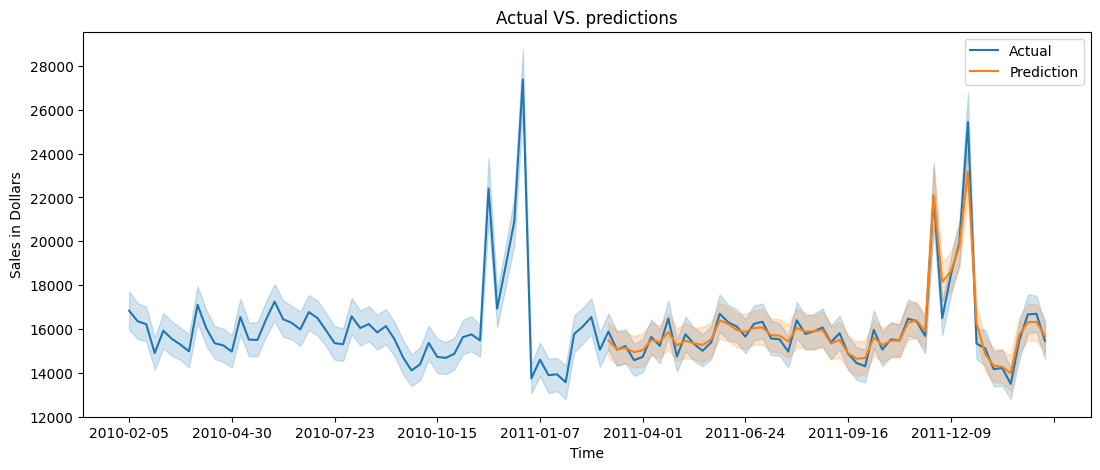

In [15]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1,figsize=(13,5))
ax=sns.lineplot(data=df['Weekly_Sales'].loc[df.index <= '2012-03-01'], label='Actual')
ax=sns.lineplot(pre['prediction'], label='Prediction')

ax.set_title('Actual VS. predictions')
ax.set_ylabel('Sales in Dollars')
ax.set_xlabel('Time')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))

Let's evaluate the model's performance on a specific store and department.

In [17]:
single_data=df[(df['Store_Encoded']==2) &(df['Dept_Encoded']==2)]

In [19]:
X_pre, y_pre =single_data.drop('Weekly_Sales', axis=1), single_data['Weekly_Sales']
single_data['prediction'] = rf_model.predict(X_pre)

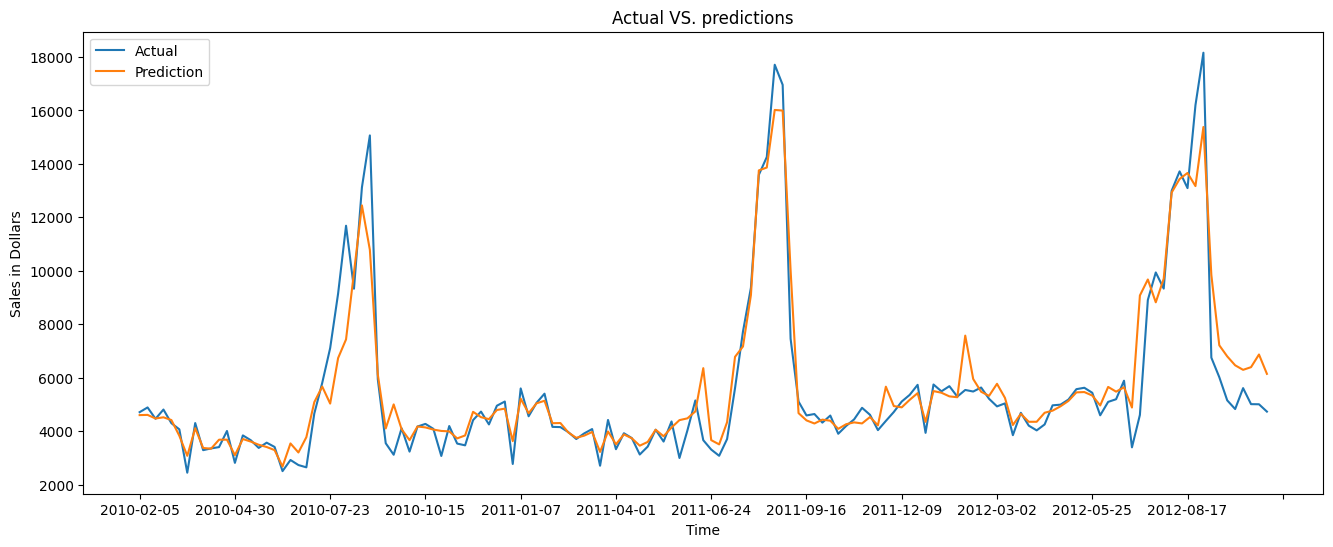

In [21]:
plt.figure(figsize=(16,6))
ax=sns.lineplot(data=single_data['Weekly_Sales'], label='Actual')
ax=sns.lineplot(single_data['prediction'], label='Prediction')

ax.set_title('Actual VS. predictions')
ax.set_ylabel('Sales in Dollars')
ax.set_xlabel('Time')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))

The weekly sales forecast appears promising. Now, let's delve into determining the feature importance for the random forest model and assess the contributions of each feature to this model.

### Feature Importance

In [ ]:
#Feature importance for the Random Forest model
importances = rf_model.feature_importances_
feature_importance=pd.DataFrame({'Feature_Names': X.columns, 'Feature_Importance(%)': importances*100}).sort_values(by='Feature_Importance(%)', ascending=False)
feature_importance.head(10)

,Feature_Names,Feature_Importance(%)
16,Dept_Encoded,62.497477
1,Size,19.310907
15,Store_Encoded,5.813119
9,CPI,2.819924
17,Month_Encoded,1.848701
13,Thanksgiving,1.796384
2,Temperature,1.315121
20,Type_B,1.121865
10,Unemployment,1.102275
3,Fuel_Price,0.702931


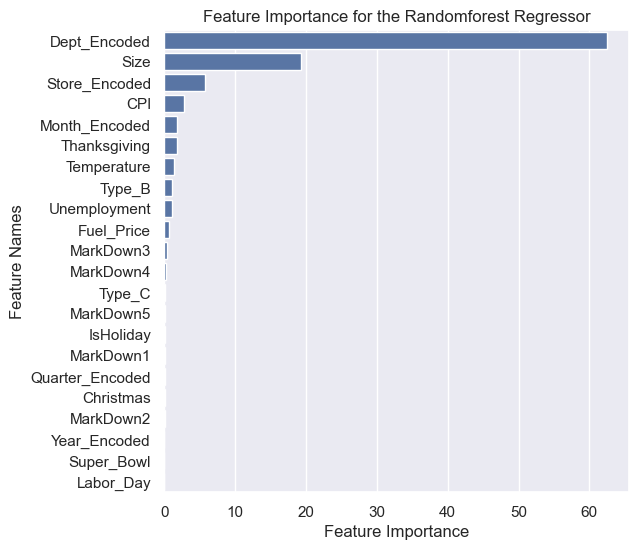

In [ ]:
#Plot the feature importance
plt.figure(figsize=(6, 6))
sns.set(font_scale=1)
ax=sns.barplot(feature_importance,
               x='Feature_Importance(%)',
               y='Feature_Names')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
# Add a title
plt.title('Feature Importance for the Randomforest Regressor')
# Show the plot
plt.show()

The department and store size collectively contribute over 80% to the feature importance of this model. Let's experiment by removing the least 10 important features from the model and retesting it.

In [ ]:
drop_list=feature_importance.tail(10).Feature_Names.to_list()
df2=df.drop(drop_list,axis=1)

In [ ]:
X=df2.drop('Weekly_Sales', axis=1)
y=df2['Weekly_Sales']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=12)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=12)
rf_model1=rf.fit(X_train, y_train)
y_pred = rf_model1.predict(X_test)
y_trainpred = rf_model1.predict(X_train)
RMSE_train=mean_squared_error(y_train, y_trainpred,squared=False)
RMSE_test=mean_squared_error(y_test, y_pred,squared=False)
R2_test=r2_score(y_test, y_pred, force_finite=False)
R2_train=r2_score(y_train, y_trainpred, force_finite=False)

print("Train RMSE:",RMSE_train)
print("Test RMSE:", RMSE_test)
print("Train R2 :\n", R2_train)
print("Test R2 :\n", R2_test)

Train RMSE: 1602.1571261569359
Test RMSE: 4270.4524134196545
Train R2 :
 0.9950097903559104
Test R2 :
 0.9650208005598786


There is no imporvment after the feature selection.

# Statistic Model

## SARIMA  Model

The ARIMA model is designed to handle one time series at a time. Therefore, I will select one department for modeling purposes as an example. Additionally, our exploratory data analysis (EDA) indicates that the same department across different stores exhibits a similar pattern. Consequently, I will utilize the average department sales across stores in this model.

### Explore the Data

In [ ]:
walmart.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Month,Quarter,Year
0,2010-02-05,1,1,24924.50,0,A,151315,42.31,2.572,0.0,...,0.0,211.096358,8.106,0,0,0,0,2,1,2010
1,2010-02-12,1,1,46039.49,1,A,151315,38.51,2.548,0.0,...,0.0,211.242170,8.106,1,0,0,0,2,1,2010
2,2010-02-19,1,1,41595.55,0,A,151315,39.93,2.514,0.0,...,0.0,211.289143,8.106,0,0,0,0,2,1,2010
3,2010-02-26,1,1,19403.54,0,A,151315,46.63,2.561,0.0,...,0.0,211.319643,8.106,0,0,0,0,2,1,2010
4,2010-03-05,1,1,21827.90,0,A,151315,46.50,2.625,0.0,...,0.0,211.350143,8.106,0,0,0,0,3,1,2010


In [22]:
#Select one dept for one store to apply te ARIMA model.
avg_sales_by_dept=walmart.groupby(['Dept','Date'])['Weekly_Sales'].mean()
avg_sales_by_dept_reset = avg_sales_by_dept.reset_index(level=0)
#Choose Dept 3 for this model as an example
single=avg_sales_by_dept_reset[avg_sales_by_dept_reset['Dept']==4]

In [23]:
y=single['Weekly_Sales']

<Axes: xlabel='Date'>

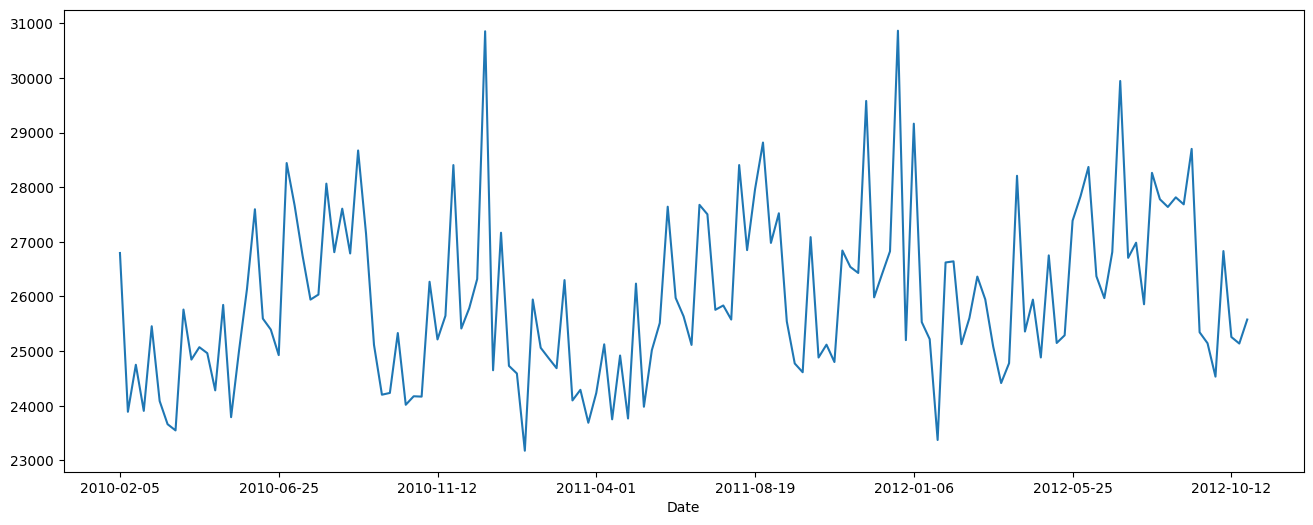

In [24]:
plt.figure(figsize=(16,6))
y.plot()

Based on the provided graph, it's apparent that the weekly sales for this department display both seasonality and some trend, suggesting that the data might be non-stationary. To confirm this hypothesis, I will conduct a Dickey-Fuller test.

### Testing for stationarity

In [25]:
#Define a function to plot the time series, ACF AND PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
def acfplot(y, lags=None, figsize=(12, 7), style='bmh'):
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

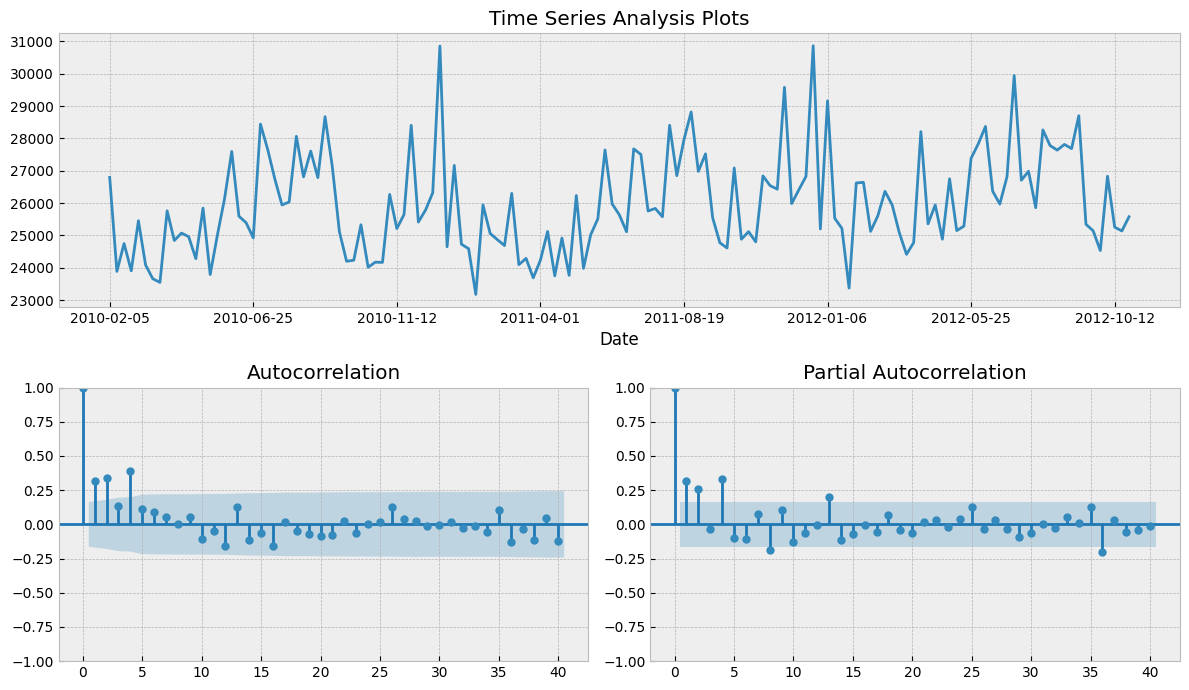

In [26]:
acfplot(y,lags=40)

In [27]:
def test_stationarity(timeseries):
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [28]:
test_stationarity(y)

Results of Dickey-Fuller Test:
Test Statistic                  -2.816369
p-value                          0.055973
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Based on the test results and graph above, it appears that our data is not stationary. Therefore, we need to perform some transformations to further stabilize the data and reduce the seasonality component.

### Differencing

In [29]:
first_order_diff=y.diff().dropna()
test_stationarity(first_order_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -5.423259
p-value                          0.000003
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


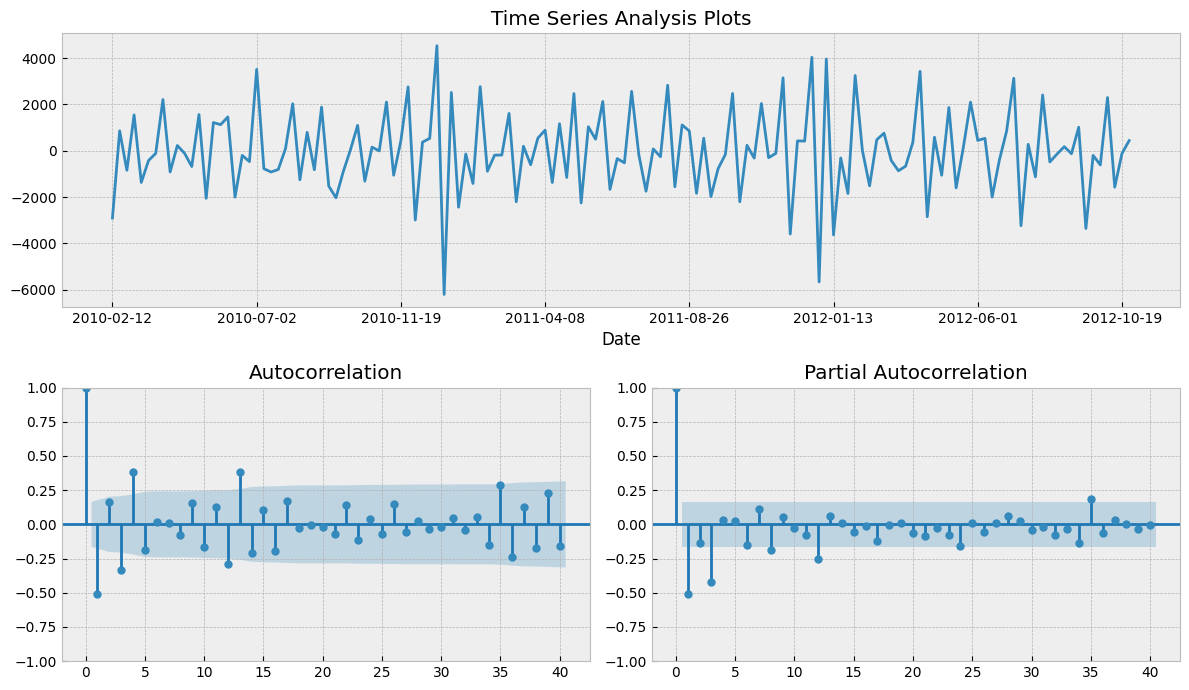

In [30]:
acfplot(first_order_diff,lags=40)

The data has been confirmed to be stationary according to both the Dickey-Fuller Test and the plot analysis. However, before proceeding, we need to verify whether after removing seasonality and trend, the data consists only of white noise. To confirm this, I will conduct one more test to assess if the residual data is solely white noise.

In [31]:
#White noise test
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'The white noise test for first order differencing is：\n', acorr_ljungbox(first_order_diff, lags=6))

The white noise test for first order differencing is：
      lb_stat     lb_pvalue
1  37.685561  8.311754e-10
2  41.492016  9.775143e-10
3  57.896908  1.653598e-12
4  79.872030  1.854021e-16
5  84.930014  7.786472e-17
6  84.961781  3.361865e-16


The p-value is much smaller than 0.05, so the data is not just white noise and is ready for the following modeling and analysis.

### Split the Data

In [32]:
train = y[:int(0.7*(len(y)))]
test = y[int(0.7*(len(y))):]

### Modeling

In [33]:
# setting initial values and some bounds for them
ps = range(2, 5)
d  = 1
qs = range(2, 5)
Ps = range(0, 2)
D  = 1
Qs = range(0, 2)
s = 52 # season length is still
from itertools import product
# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [34]:
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
def optimizeSARIMA(parameters_list, d, D, s):
    """Return dataframe with parameters and corresponding AIC

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order
        s - length of season
    """
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        # we need try-except because on some combinations model fails to converge
        try:
            model=SARIMAX(train, order=(param[0],d, param[1]),
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table


In [35]:
result_table = optimizeSARIMA(parameters_list, d, D, s)
result_table.head()

/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning

/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning

/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:4

,parameters,aic
0,"(4, 2, 0, 0)",764.138781
1,"(4, 2, 1, 0)",765.716973
2,"(4, 2, 0, 1)",765.751500
3,"(3, 3, 0, 0)",766.409282
4,"(2, 2, 0, 0)",767.299249


In [36]:
p, q, P,Q, = result_table.parameters[0]

best_model=SARIMAX(train, order=(p, d, q),
                seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/lovehideto/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  100
Model:             SARIMAX(4, 1, 2)x(0, 1, [], 52)   Log Likelihood                -375.069
Date:                             Sun, 28 Jan 2024   AIC                            764.139
Time:                                     18:50:49   BIC                            777.090
Sample:                                 02-05-2010   HQIC                           769.012
                                      - 12-30-2011                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6462      0.095      6.782      0.000       0.459       0.833
ar.L2         -0.3401      

In [38]:
print(acorr_ljungbox(best_model.resid, lags=6))

    lb_stat  lb_pvalue
1  0.001074   0.973861
2  0.007766   0.996125
3  0.033549   0.998382
4  0.682504   0.953469
5  0.913255   0.969255
6  1.721687   0.943435


P value larger than 0.05, so we fail to reject the null hypothesis, residuals are all white noise.

[Text(0.5, 1.0, 'Prediction of Weekly Sales Diff Using Auto-ARIMA')]

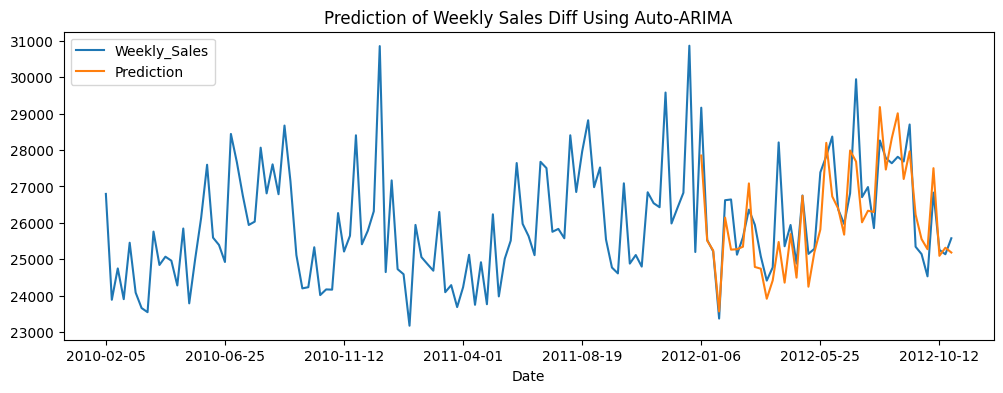

In [39]:
y_pred = best_model.predict(100, 142)
y_pred = pd.DataFrame(y_pred)

ori_data=pd.DataFrame(y)
ori_data['Prediction']=y_pred['predicted_mean']
ax=ori_data[['Weekly_Sales','Prediction']].plot(figsize=(12,4))
ax.set(title='Prediction of Weekly Sales Diff Using Auto-ARIMA')

In [40]:
RMSE_test=mean_squared_error(test, y_pred['predicted_mean'],squared=False)
R2_test=r2_score(test, y_pred['predicted_mean'], force_finite=False)

print("Test RMSE:", RMSE_test)
print("Test R2 :\n", R2_test)

Test RMSE: 896.3599976753801
Test R2 :
 0.5973670024996302


# Deep Learning Model
## LSTM Model

Deep learning models are known to be computationally intensive and time-consuming. Therefore, for this particular model, I will use single department in single store.

In [ ]:
walmart.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Month,Quarter,Year
0,2010-02-05,1,1,24924.50,0,A,151315,42.31,2.572,0.0,...,0.0,211.096358,8.106,0,0,0,0,2,1,2010
1,2010-02-12,1,1,46039.49,1,A,151315,38.51,2.548,0.0,...,0.0,211.242170,8.106,1,0,0,0,2,1,2010
2,2010-02-19,1,1,41595.55,0,A,151315,39.93,2.514,0.0,...,0.0,211.289143,8.106,0,0,0,0,2,1,2010
3,2010-02-26,1,1,19403.54,0,A,151315,46.63,2.561,0.0,...,0.0,211.319643,8.106,0,0,0,0,2,1,2010
4,2010-03-05,1,1,21827.90,0,A,151315,46.50,2.625,0.0,...,0.0,211.350143,8.106,0,0,0,0,3,1,2010


I will use the same department as I used in the SARIMA model. And choose the store 1 as an example.

In [6]:
df1=walmart[(walmart['Dept']==4) & (walmart['Store']==1)]

### Drop Useless Columns

Based on the exploratory data analysis (EDA), it's evident that some of the markdown data are incomplete or lacking. Therefore, for this model, I will exclude the markdowns from the dataset. Since I have choose sepcific store and department, I will drop the store and department columns as well.

In [7]:
df1=df1.drop(['Store','Dept','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [8]:
df1.set_index('Date', inplace=True)

### Encoding Data

In [9]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_list=['Month','Quarter','Year']
# Apply label encoding to columns in the list
for col in label_list:
    df1[col+'_Encoded']=label_encoder.fit_transform(df1[col])
df1=df1.drop(label_list,axis=1)

In [10]:
#One-Hot encoding
df1=pd.get_dummies(df1, columns=['Type'], prefix=['Type'], drop_first=True, dtype=int)

### Scale The Data

In [24]:
scaler = StandardScaler()
col_list=df1.columns
df1[col_list]=scaler.fit_transform(df1[col_list])
df1.head()

,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Month_Encoded,Quarter_Encoded,Year_Encoded
Date,,,,,,,,,,,,,,
2010-02-05,1.023782,-0.274204,0.0,-1.830686,-1.521079,-1.130288,1.295958,-0.146385,-0.146385,-0.119098,-0.119098,-1.373525,-1.385591,-1.210899
2010-02-12,-0.552296,3.646917,0.0,-2.098280,-1.577441,-1.096657,1.295958,6.831301,-0.146385,-0.119098,-0.119098,-1.373525,-1.385591,-1.210899
2010-02-19,-0.046981,-0.274204,0.0,-1.998285,-1.657288,-1.085823,1.295958,-0.146385,-0.146385,-0.119098,-0.119098,-1.373525,-1.385591,-1.210899
2010-02-26,-0.788922,-0.274204,0.0,-1.526473,-1.546911,-1.078788,1.295958,-0.146385,-0.146385,-0.119098,-0.119098,-1.373525,-1.385591,-1.210899
2010-03-05,0.384202,-0.274204,0.0,-1.535627,-1.396612,-1.071754,1.295958,-0.146385,-0.146385,-0.119098,-0.119098,-1.064698,-1.385591,-1.210899


### Transforming The Input Data
I will build a Multistep LSTM model, so I have to transfer the data into small windows first.

In [25]:
def window(df, steps_in, steps_out):
    X, y = list(), list()

    for i in range(len(df)):
        # Calculate indexes
        in_end_idx = i + steps_in-1
        out_end_idx = in_end_idx + steps_out

        # Exit condition
        if out_end_idx+1 > len(df): break

        # Slice sequence
        seq_x, seq_y = df.iloc[i:in_end_idx+1, :], df.iloc[(in_end_idx+1):(out_end_idx+1), 0]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X),np.array(y)


In [255]:
# Step parameters
steps_in = 52
steps_out = 8
n_features = len(df1.columns)

# Split data into train and test
train_size = int(len(df1) * 0.8)
train_df = df1.iloc[:train_size]
test_df = df1.iloc[train_size - steps_in-steps_out+1:].reset_index(drop = True)
#Transform the data
train_X, train_y = window(train_df, steps_in, steps_out)
test_X, test_y = window(test_df, steps_in, steps_out)


# Verify Shapes for LSTM model
print("Train X: ",train_X.shape)
print("Train Y: ",train_y.shape)
print("Test X: ",test_X.shape)
print("Test Y: ",test_y.shape)

Train X:  (55, 52, 14)
Train Y:  (55, 8)
Test X:  (29, 52, 14)
Test Y:  (29, 8)


### Model

In [256]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units = 200, input_shape = (steps_in, n_features), dropout = 0.2, return_sequences = True))
model.add(LSTM(units = 100, dropout = 0.2, return_sequences = True))
model.add(LSTM(units = 100, dropout = 0.2))
model.add(Dense(steps_out,activation = 'linear'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 52, 200)           172000    
                                                                 
 lstm_73 (LSTM)              (None, 52, 100)           120400    
                                                                 
 lstm_74 (LSTM)              (None, 100)               80400     
                                                                 
 dense_23 (Dense)            (None, 8)                 808       
                                                                 
Total params: 373608 (1.43 MB)
Trainable params: 373608 (1.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [257]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [258]:
model.fit(train_X, train_y, epochs=70, batch_size=16, verbose=0)

In [259]:
y_preds_wodl = []
test_X_flat =test_X.reshape((test_X.shape[0]*test_X.shape[1], test_X.shape[2]))
curr_idx = 0

for i in range(test_X_flat.shape[0]):
    # Exit Condition
    if curr_idx >= (test_X_flat.shape[0] // steps_in):
      break

    input = test_X_flat[curr_idx:curr_idx + steps_in]
    pred = model.predict(np.reshape(input, (-1, input.shape[0], input.shape[1])))
    curr_idx += steps_out

    y_preds_wodl.extend(pred[0])

y_preds_wodl = np.array(y_preds_wodl)
y_preds_wodl = y_preds_wodl.reshape(y_preds_wodl.shape[0], -1)
tdf_wodl = pd.DataFrame(y_preds_wodl, np.arange(len(y_preds_wodl)))

1/1 [==============================] - 0s 75ms/step


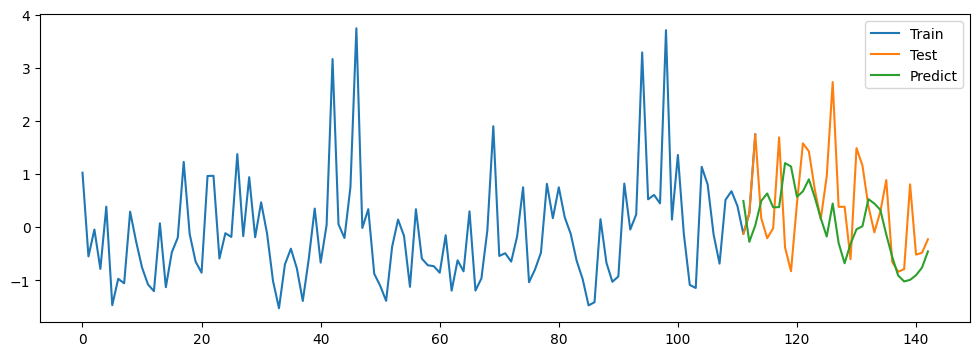

In [260]:
### Final plot with actual values and predictions
fig, ax = plt.subplots(figsize = (12, 4))

ax.plot(np.arange(len(train_df['Weekly_Sales'])), train_df['Weekly_Sales'], label = 'Train')
ax.plot(np.arange(len(df1))[-len(tdf_wodl):], test_df['Weekly_Sales'][-len(tdf_wodl):], label = 'Test')
ax.plot(np.arange(len(df1))[-len(tdf_wodl):], tdf_wodl[0], label = 'Predict')

plt.legend(loc = 'upper right')
plt.show()

In [261]:
RMSE_test=mean_squared_error(test_df['Weekly_Sales'][-len(tdf_wodl):], tdf_wodl[0],squared=False)
R2_test=r2_score(test_df['Weekly_Sales'][-len(tdf_wodl):], tdf_wodl[0], force_finite=False)

print("Test RMSE:", RMSE_test)
print("Test R2 :\n", R2_test)

Test RMSE: 0.9786040179709437
Test R2 :
 -0.2589620667983865


This model is not a good choice as well.

# Summary
In this project, I experimented with four different models. Initially, I utilized the Random Forest Regressor and XGBoost Regressor for the machine learning aspect. Both models showed promising results, particularly the Random Forest Regressor, which achieved an exceptional R2 score of 0.995 on the training set. However, both models exhibited relatively high root mean square error (RMSE).

Following this, I explored a traditional statistical time series approach. Based on the exploratory data analysis (EDA) findings, which revealed seasonality in the department's weekly sales and consistent patterns across different stores for the same department, I constructed a SARIMA model using the average department sales across stores. Although this model yielded a lower RMSE of 896, it had a diminished R2 score of 0.6.

Seeking further improvements, I experimented with a deep learning model called LMST, a type of Recurrent Neural Network (RNN) tailored for handling short/long-term time series data. Unfortunately, the results from applying this model to the department's data were disappointing.

Consequently, I concluded that the Random Forest model performed best for this project. With its notably high R2 score and evident alignment of predictions with the validation data, it emerged as the preferred choice for achieving accurate sales forecasting.